In [94]:
#エクセル ファイルの読み込み
import pandas as pd
input_file_name = 'data.xlsx'
input_book = pd.ExcelFile(input_file_name)
input_sheet_name = input_book.sheet_names
num_sheet = len(input_sheet_name)
input_sheet_df = input_book.parse(input_sheet_name[0])
size = input_sheet_df['行列のサイズ']
time =  input_sheet_df['実行時間']

In [98]:
#近似曲線をy = wx^3と仮定してwの値を決める
def fitting():
    total = 1
    w = 1.9e-8
    while total>0:
        total = 0
        for i in range(len(time)):
            total = time[i]-size[i]*size[i]*size[i]*w
        w+=0.000000000001
    return w
w = fitting()

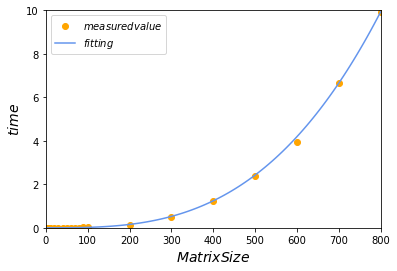

In [105]:
#グラフのプロット
def curve(x,w):
    return x*x*x*w
x = np.linspace(0,800,100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(size, time, marker='o', linestyle='None',color='orange',label='$measured value$')
plt.plot(x,curve(x,w),color='cornflowerblue',label='$fitting$')
plt.legend(loc="upper left")
plt.xlim(0,800)
plt.ylim(0,10)
plt.xlabel('$MatrixSize$', fontsize=14)
plt.ylabel('$time$', fontsize=14)
plt.show()